<a href="https://colab.research.google.com/github/gogetto1/Data_Science/blob/master/analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


 







### <a name='a1'></a> Import Bibliotek

In [ ]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.18.5
Pandas: 1.0.5


### <a name='a2'></a> Załadowanie danych

In [ ]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-08-27 to 2015-08-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-21,3295.00,3314.3962,3275.3900,3284.72,3575862
...,...,...,...,...,...
2015-09-04,497.65,502.8500,495.6400,499.00,2692500
2015-09-03,514.50,515.8400,502.5700,504.72,3149600
2015-09-02,505.09,510.8600,497.7200,510.55,3707100




```
# Sformatowano jako kod
```

### <a name='a3'></a> Eksploracja danych

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-21,3295.00,3314.3962,3275.3900,3284.72,3575862


In [ ]:
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-04,497.65,502.85,495.64,499.00,2692500
2015-09-03,514.50,515.84,502.57,504.72,3149600
2015-09-02,505.09,510.86,497.72,510.55,3707100
2015-09-01,499.14,510.00,493.43,496.54,3864500
2015-08-31,516.44,519.41,509.07,512.89,3002200


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]

In [ ]:
df.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1378.821823,1393.016140,1363.143859,1379.020441,4.264332e+06
std,633.656356,642.512767,624.734528,634.167327,2.141601e+06
min,478.010000,493.500000,474.000000,482.070000,8.813370e+05
25%,790.562500,798.360000,782.162500,791.340000,2.819564e+06
50%,1443.495000,1459.670000,1414.510000,1442.170000,3.707442e+06
75%,1816.427500,1829.895000,1800.045000,1815.960000,5.101689e+06
max,3450.050000,3453.000000,3378.000000,3441.850000,1.655260e+07


In [ ]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1258.0,1.378822e+03,6.336564e+02,478.01,7.905625e+02,1443.495,1.816428e+03,3450.05
high,1258.0,1.393016e+03,6.425128e+02,493.50,7.983600e+02,1459.670,1.829895e+03,3453.00
low,1258.0,1.363144e+03,6.247345e+02,474.00,7.821625e+02,1414.510,1.800045e+03,3378.00
close,1258.0,1.379020e+03,6.341673e+02,482.07,7.913400e+02,1442.170,1.815960e+03,3441.85
volume,1258.0,4.264332e+06,2.141601e+06,881337.00,2.819564e+06,3707442.500,5.101689e+06,16552598.00


### <a name='a4'></a> Selekcja kolumn

In [ ]:

df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-21,3295.00,3314.3962,3275.3900,3284.72,3575862
2020-08-20,3252.00,3312.6200,3238.0000,3297.37,3332478
2020-08-19,3303.01,3315.9000,3256.0001,3260.48,4185137
2020-08-18,3212.00,3320.0000,3205.8187,3312.49,5345974
2020-08-17,3173.12,3194.9700,3154.1775,3182.41,2691237


In [ ]:
df['open']

Date
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
2020-08-21    3295.00
2020-08-20    3252.00
2020-08-19    3303.01
2020-08-18    3212.00
2020-08-17    3173.12
2020-08-14    3178.18
Name: open, dtype: float64

In [ ]:
df.open

Date
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
2020-08-21    3295.00
2020-08-20    3252.00
2020-08-19    3303.01
2020-08-18    3212.00
2020-08-17    3173.12
2020-08-14    3178.18
Name: open, dtype: float64

In [ ]:
df[['open']]

,open
Date,
2020-08-27,3450.05
2020-08-26,3351.11
2020-08-25,3294.99
2020-08-24,3310.15
2020-08-21,3295.00
2020-08-20,3252.00
2020-08-19,3303.01
2020-08-18,3212.00
2020-08-17,3173.12


In [ ]:
df[['open', 'close']]

,open,close
Date,,
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49
2020-08-24,3310.15,3307.46
2020-08-21,3295.00,3284.72
2020-08-20,3252.00,3297.37
2020-08-19,3303.01,3260.48
2020-08-18,3212.00,3312.49
2020-08-17,3173.12,3182.41


In [ ]:
df.iloc[:, 0]

Date
2020-08-27    3450.05
2020-08-26    3351.11
2020-08-25    3294.99
2020-08-24    3310.15
2020-08-21    3295.00
2020-08-20    3252.00
2020-08-19    3303.01
2020-08-18    3212.00
2020-08-17    3173.12
2020-08-14    3178.18
Name: open, dtype: float64

In [ ]:
df.iloc[:, [0,3]]

,open,close
Date,,
2020-08-27,3450.05,3400.00
2020-08-26,3351.11,3441.85
2020-08-25,3294.99,3346.49
2020-08-24,3310.15,3307.46
2020-08-21,3295.00,3284.72
2020-08-20,3252.00,3297.37
2020-08-19,3303.01,3260.48
2020-08-18,3212.00,3312.49
2020-08-17,3173.12,3182.41


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2020-08-27,3400.00,4264795
2020-08-26,3441.85,6508743
2020-08-25,3346.49,3992842
2020-08-24,3307.46,4666258
2020-08-21,3284.72,3575862
2020-08-20,3297.37,3332478
2020-08-19,3260.48,4185137
2020-08-18,3312.49,5345974
2020-08-17,3182.41,2691237


In [ ]:
df.iloc[:, -1]

Date
2020-08-27    4264795
2020-08-26    6508743
2020-08-25    3992842
2020-08-24    4666258
2020-08-21    3575862
2020-08-20    3332478
2020-08-19    4185137
2020-08-18    5345974
2020-08-17    2691237
2020-08-14    2751723
Name: volume, dtype: int64

In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2020-08-27,4264795
2020-08-26,6508743
2020-08-25,3992842
2020-08-24,4666258
2020-08-21,3575862
2020-08-20,3332478
2020-08-19,4185137
2020-08-18,5345974
2020-08-17,2691237


### <a name='a5'></a>  Selekcja wierszy

In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-21,3295.00,3314.3962,3275.3900,3284.72,3575862
2020-08-20,3252.00,3312.6200,3238.0000,3297.37,3332478
2020-08-19,3303.01,3315.9000,3256.0001,3260.48,4185137
2020-08-18,3212.00,3320.0000,3205.8187,3312.49,5345974
2020-08-17,3173.12,3194.9700,3154.1775,3182.41,2691237


In [ ]:
df.iloc[0]

open         3450.05
high         3453.00
low          3378.00
close        3400.00
volume    4264795.00
Name: 2020-08-27 00:00:00, dtype: float64

In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842


In [ ]:
df.loc['2020-08-20']

,open,high,low,close,volume
Date,,,,,
2020-08-20,3252.0,3312.62,3238.0,3297.37,3332478


In [ ]:
df.loc['2020-08-27': '2020-08-20']

,open,high,low,close,volume
Date,,,,,
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-21,3295.00,3314.3962,3275.3900,3284.72,3575862
2020-08-20,3252.00,3312.6200,3238.0000,3297.37,3332478


### <a name='a6'></a> Obliczanie nowych kolumn

In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 329 entries, 2020-08-27 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    329 non-null    float64
 1   High    329 non-null    float64
 2   Low     329 non-null    float64
 3   Close   329 non-null    float64
 4   Volume  329 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.4 KB


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,32.40,33.07,32.2700,32.80,21306491
2020-08-26,31.01,32.71,30.9500,32.30,20599776
2020-08-25,31.04,31.19,30.6000,31.19,10056762
2020-08-24,30.97,31.30,30.3700,31.04,17406239
2020-08-21,31.39,31.82,30.7144,30.83,20216997


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,329.000000,329.000000,329.000000,329.00000,3.290000e+02
mean,33.772944,34.451718,32.961282,33.72924,2.506019e+07
std,5.743001,5.677277,5.758421,5.68188,2.037883e+07
min,15.960000,17.800000,13.710000,14.82000,3.380003e+06
25%,30.000000,30.420000,29.360000,30.05000,1.033152e+07
50%,32.710000,33.300000,31.900000,32.68000,2.097652e+07
75%,37.500000,37.900000,36.530000,37.04000,3.291258e+07
max,46.980000,47.080000,45.080000,46.38000,1.863225e+08


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,32.40,33.07,32.27,32.80,21306491
2020-08-26,31.01,32.71,30.95,32.30,20599776
2020-08-25,31.04,31.19,30.60,31.19,10056762


In [ ]:
df['Average'] = (df.Open + df.Close) /2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2020-08-27,32.40,33.07,32.2700,32.80,21306491,32.600
2020-08-26,31.01,32.71,30.9500,32.30,20599776,31.655
2020-08-25,31.04,31.19,30.6000,31.19,10056762,31.115
2020-08-24,30.97,31.30,30.3700,31.04,17406239,31.005
2020-08-21,31.39,31.82,30.7144,30.83,20216997,31.110


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df[['Close']].shift(1)

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2020-08-21,31.41
2020-08-24,30.83
2020-08-25,31.04


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_Change'] = df.Close /df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [ ]:
del df['Daily Change']

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df.Daily_Change.min()

-0.21628767847699626

In [ ]:
df.Daily_Change.max()

0.3825910931174088

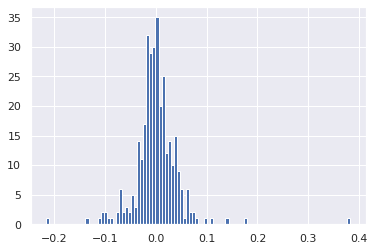

In [ ]:
import seaborn as sns
sns.set()
df.Daily_Change.hist(bins=100)

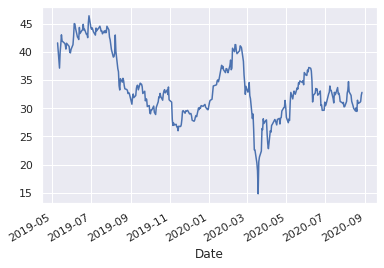

In [ ]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-08-21,31.39,31.82,30.7144,30.83,20216997,31.110,31.41,-0.018465
2020-08-24,30.97,31.30,30.3700,31.04,17406239,31.005,30.83,0.006812
2020-08-25,31.04,31.19,30.6000,31.19,10056762,31.115,31.04,0.004832


In [ ]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2020-08-20,29.13,31.70,28.48,31.41,56663347,30.270,29.42,0.067641
2020-08-24,30.97,31.30,30.37,31.04,17406239,31.005,30.83,0.006812
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832


In [ ]:
df_positive.Daily_Change.mean()

0.028803726546528595

In [ ]:
df_negative = df[df.Daily_Change < 0]

In [ ]:
df_negative.Daily_Change.mean()

-0.025903785129287843

In [ ]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2020-08-21    False
2020-08-24    False
2020-08-25     True
2020-08-26    False
2020-08-27    False
Length: 329, dtype: bool

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303


In [ ]:
df.index > '2019-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
df[df.index > '2019-11-02']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.38,-0.013514
...,...,...,...,...,...,...,...,...
2020-08-21,31.39,31.82,30.7144,30.83,20216997,31.110,31.41,-0.018465
2020-08-24,30.97,31.30,30.3700,31.04,17406239,31.005,30.83,0.006812
2020-08-25,31.04,31.19,30.6000,31.19,10056762,31.115,31.04,0.004832


In [ ]:
df[(df.index >= '2019-11-02') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-04,31.45,31.75,30.120,31.08,32330121,31.265,31.37,-0.009245
2019-11-05,29.13,29.30,27.970,28.02,52180615,28.575,31.08,-0.098456
2019-11-06,26.06,27.55,25.580,26.94,133569790,26.500,28.02,-0.038544
2019-11-07,26.80,27.42,26.450,27.38,65949472,27.090,26.94,0.016333
2019-11-08,27.48,27.62,26.915,27.01,45263118,27.245,27.38,-0.013514
2019-11-11,27.03,27.21,26.230,27.14,41445732,27.085,27.01,0.004813
2019-11-12,27.38,27.66,26.660,26.70,37095389,27.040,27.14,-0.016212
2019-11-13,26.47,26.82,26.140,26.71,34512663,26.590,26.70,0.000375
2019-11-14,26.80,26.86,25.665,25.99,28027875,26.395,26.71,-0.026956


In [ ]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.70,30.7412,31.37,10460430,31.41,31.50,-0.004127
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.09,26.94,0.016333


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2020-08-21,31.39,31.82,30.7144,30.83,20216997,31.110,31.41,-0.018465
2020-08-24,30.97,31.30,30.3700,31.04,17406239,31.005,30.83,0.006812
2020-08-25,31.04,31.19,30.6000,31.19,10056762,31.115,31.04,0.004832


In [ ]:
df[(df.index.year == 2019)& (df.index.month == 5)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.2500,43.00,38115524,42.240,41.29,0.041414
2019-05-17,41.98,43.29,41.2700,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.68,39.4600,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.24,41.2500,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.28,40.5000,41.25,9089469,41.150,41.50,-0.006024


In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127
2020-04-01,26.50,26.7670,24.8101,25.42,38538381,25.960,27.92,-0.089542
2020-05-01,29.13,29.7200,28.3250,28.39,19290192,28.760,30.27,-0.062108
2020-06-01,35.64,36.3900,35.1600,35.82,21893806,35.730,36.32,-0.013767
2020-07-01,30.96,31.2650,30.1622,30.43,13611544,30.695,31.08,-0.020914
